In [1]:
%matplotlib inline

In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Global_Mobility_Report.csv')

/Users/asifali/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.columns

Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'metro_area', 'iso_3166_2_code', 'census_fips_code', 'date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')

In [5]:
df.sub_region_2.value_counts()

Washington County    8832
Jefferson County     7327
Franklin County      6906
Jackson County       6315
Lincoln County       6019
                     ... 
Wirt County             2
Wheeler County          1
Lyman County            1
Real County             1
Nome                    1
Name: sub_region_2, Length: 9915, dtype: int64

In [6]:
df.sub_region_1.value_counts()

State of São Paulo            115684
State of Minas Gerais          79593
Texas                          62201
State of Rio Grande do Sul     47702
State of Paraná                46746
                               ...  
Salacgrīva Municipality            2
Baldone Municipality               2
Centre-Nord Region                 1
Krimulda Municipality              1
Savanes Region                     1
Name: sub_region_1, Length: 1860, dtype: int64

In [7]:
df2 = df[['date', 'country_region', 'sub_region_1', 'sub_region_2','retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline']]

In [8]:
df2.count()

date                                                  3864588
country_region                                        3864588
sub_region_1                                          3798345
sub_region_2                                          3218039
retail_and_recreation_percent_change_from_baseline    2436492
grocery_and_pharmacy_percent_change_from_baseline     2353081
dtype: int64

In [9]:
df3 = df2.dropna()

In [10]:
df3.count()

date                                                  1680284
country_region                                        1680284
sub_region_1                                          1680284
sub_region_2                                          1680284
retail_and_recreation_percent_change_from_baseline    1680284
grocery_and_pharmacy_percent_change_from_baseline     1680284
dtype: int64

In [11]:
df3.describe()

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline
count,1.680284e+06,1.680284e+06
mean,-2.286069e+01,-1.820421e+00
std,2.823298e+01,2.475976e+01
min,-1.000000e+02,-1.000000e+02
25%,-4.100000e+01,-1.200000e+01
50%,-1.800000e+01,-1.000000e+00
75%,-3.000000e+00,1.000000e+01
max,5.450000e+02,3.970000e+02


In [12]:
df3.head()

,date,country_region,sub_region_1,sub_region_2,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline
6829,2020-02-15,Argentina,Buenos Aires,Comuna 1,14.0,2.0
6830,2020-02-16,Argentina,Buenos Aires,Comuna 1,-1.0,-2.0
6831,2020-02-17,Argentina,Buenos Aires,Comuna 1,-6.0,-15.0
6832,2020-02-18,Argentina,Buenos Aires,Comuna 1,12.0,10.0
6833,2020-02-19,Argentina,Buenos Aires,Comuna 1,8.0,8.0


In [13]:
df4 = df3.set_index('date').sort_index()

In [14]:
df4.index.max()

'2021-01-12'

In [15]:
df4.index.min()

'2020-02-15'

In [16]:
df4.country_region.value_counts()

United States     472442
Brazil            206272
India             177523
United Kingdom     83859
Turkey             76964
Argentina          73955
Poland             73803
Netherlands        55125
Australia          54331
Canada             46741
Italy              35106
France             31284
Portugal           26014
Colombia           23900
Sweden             22770
Czechia            21499
Austria            19020
Romania            18062
Denmark            17149
Spain              14229
Chile              14125
Nigeria            12627
Slovakia           11552
Peru               11376
Finland            11337
Norway              9662
Bulgaria            9151
Ecuador             8999
Guatemala           6419
Lithuania           4850
Bolivia             4822
Lebanon             4246
Israel              4000
Slovenia            3682
Honduras            3544
Belgium             3321
Tanzania            2048
Cameroon            1509
Rwanda               859
Mozambique           757


In [17]:
df5 = df4[(df4['country_region'] == 'United States') | (df4['country_region'] == 'India')]

In [18]:
df5.sort_values('country_region').head()

,country_region,sub_region_1,sub_region_2,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline
date,,,,,
2020-05-01,India,Madhya Pradesh,Agar,-77.0,-19.0
2020-05-13,India,Chhattisgarh,Mahasamund,-65.0,44.0
2020-10-23,India,Telangana,Nalgonda,3.0,48.0
2020-10-23,India,Maharashtra,Nanded,-18.0,40.0
2020-05-13,India,Delhi,New Delhi,-89.0,-70.0


## India

In [19]:
india = df5[df5.country_region == 'India']

In [20]:
india.to_csv('India.csv')

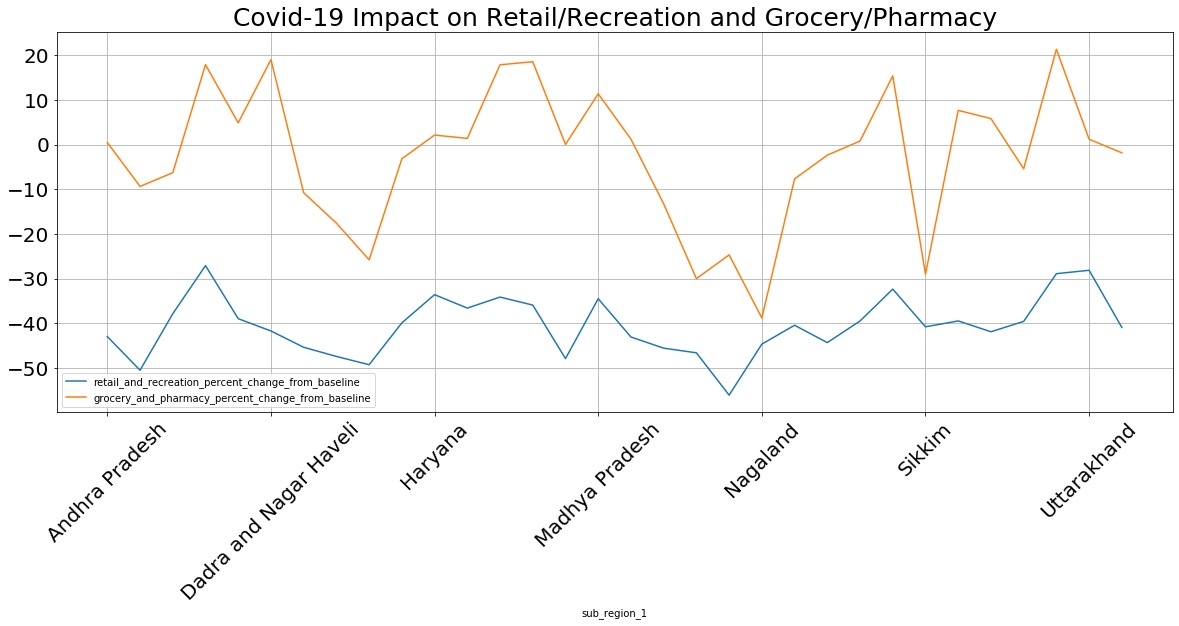

In [21]:
ind_grp = india.groupby('sub_region_1')

ind_grp.mean().plot(grid=True,figsize = (20,7),fontsize=20, rot=45)
plt.title('Covid-19 Impact on Retail/Recreation and Grocery/Pharmacy',fontsize=25)
plt.show()

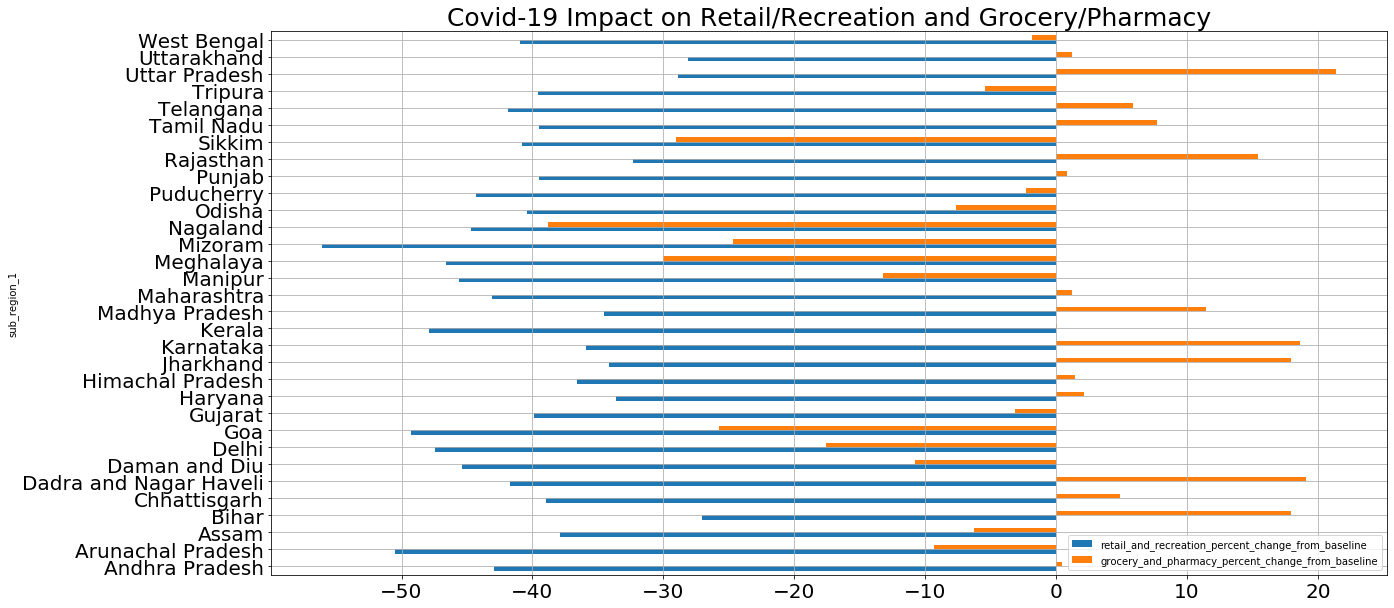

In [22]:
ind_grp.mean().plot(kind='barh',figsize = (20,10), grid=True,fontsize=20)
plt.title('Covid-19 Impact on Retail/Recreation and Grocery/Pharmacy',fontsize=25)
plt.show()

## United States

In [23]:
us = df5[df5.country_region == 'United States']

In [24]:
us.to_csv('US.csv')

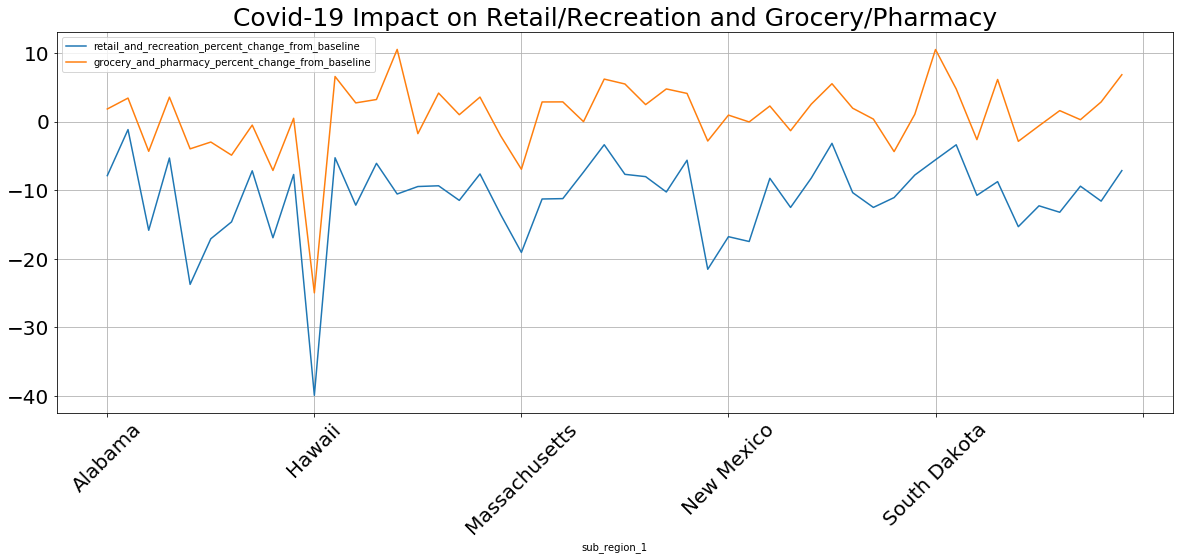

In [25]:
us_grp = us.groupby('sub_region_1')

us_grp.mean().plot(grid=True,figsize = (20,7), fontsize = 20, rot=45)
plt.title('Covid-19 Impact on Retail/Recreation and Grocery/Pharmacy',fontsize=25)
plt.show()

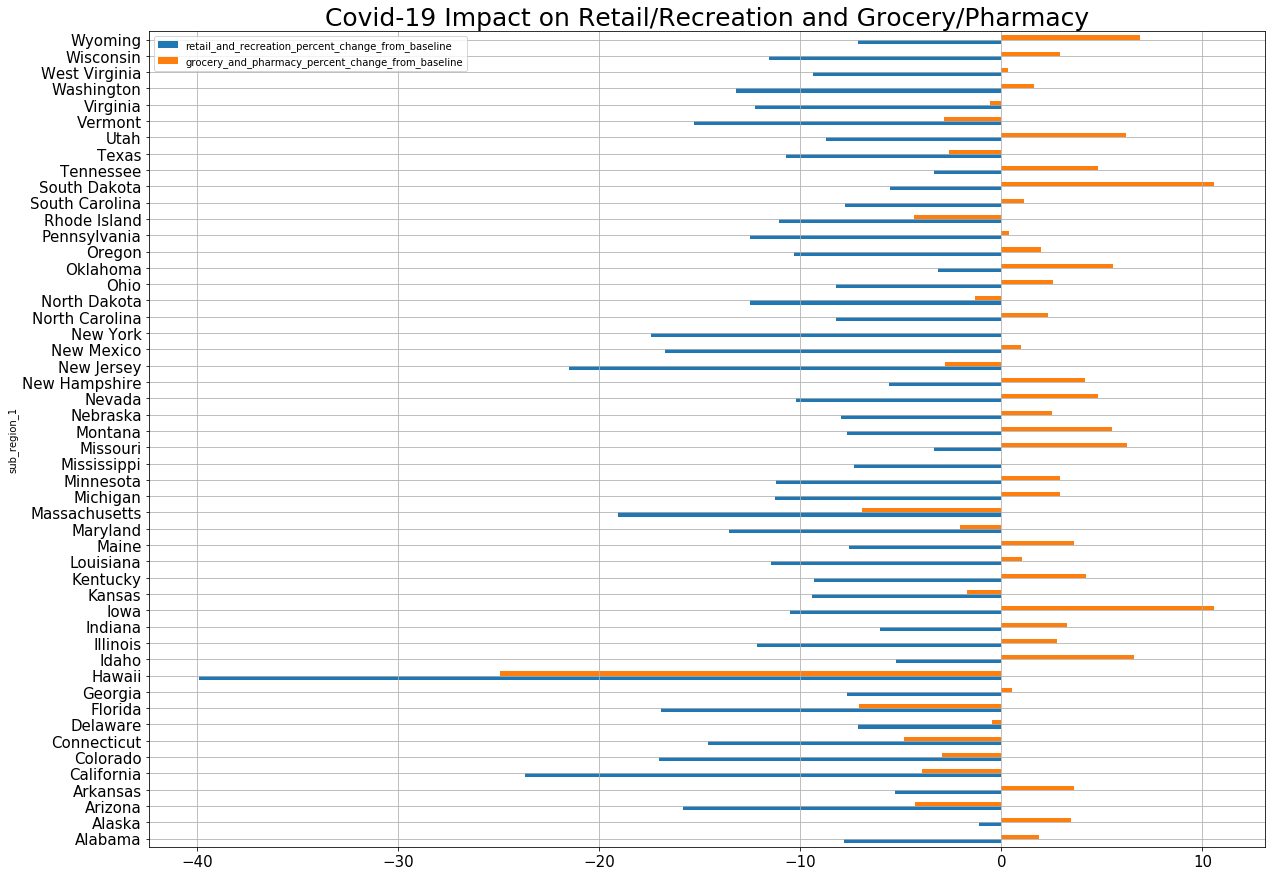

In [26]:
us_grp.mean().plot(kind='barh',grid=True,figsize = (20,15), fontsize = 15)
plt.title('Covid-19 Impact on Retail/Recreation and Grocery/Pharmacy',fontsize=25)
plt.show()

In [27]:
dated_us = us.sort_index()

In [28]:
dated_us.head()

,country_region,sub_region_1,sub_region_2,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline
date,,,,,
2020-02-15,United States,Iowa,Buchanan County,2.0,-4.0
2020-02-15,United States,Iowa,Buena Vista County,9.0,7.0
2020-02-15,United States,Iowa,Carroll County,1.0,-6.0
2020-02-15,United States,Iowa,Cass County,10.0,-1.0
2020-02-15,United States,Iowa,Cedar County,-2.0,-3.0
